In [263]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, DBSCAN

from sklearn.model_selection import train_test_split

# Oversampling/undersampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

%matplotlib inline

# To do:
1. Annotate code
2. Provide inline expanation where needed

In [3]:
data = pd.read_csv('google_review_ratings.csv')
data.head()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0   
1         0.5          0.0          0.5          0.0          0.0   
2         0.5          0.0          0.5          0.0          0.0   
3         0.5          0.0          0.5          0.0          0.0   
4         0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  Unnamed: 25  
0          0.0          0.0          0.0          NaN  
1          0.0          0.0          0.0          NaN  
2          0.0          0.0          0.0          NaN  
3          0.0          0.0          0.0          NaN  
4          0.0          0.0          0.0          NaN  

[5 rows x 26 columns]

In [4]:
data.drop('Unnamed: 25', axis='columns', inplace=True)

In [5]:
data.columns=['user_id', 'rtg_churches', 'rtg_resorts', 'rtg_beaches', 'rtg_parks', 'rtg_theathers', 'rtg_museums',
              'rtg_malls', 'rtg_zoo', 'rtg_restaurants', 'rtg_pubs_bars', 'rtg_local_service', 
              'rtg_burger_pizza_shops', 'rtg_hotels_other_lodgins', 'rtg_juice_bars',
              'rtg_art_galleries', 'rtg_dance_clubs', 'rtg_swimming_pools',
              'rtg_gyms', 'rtg_bakeries', 'rtg_beauty_spas', 'rtg_cafes',
              'rtg_view_points', 'rtg_monuments', 'rtg_gardens']

In [6]:
data.head()

user_id  rtg_churches  rtg_resorts  rtg_beaches  rtg_parks  rtg_theathers  \
0  User 1           0.0          0.0         3.63       3.65            5.0   
1  User 2           0.0          0.0         3.63       3.65            5.0   
2  User 3           0.0          0.0         3.63       3.63            5.0   
3  User 4           0.0          0.5         3.63       3.63            5.0   
4  User 5           0.0          0.0         3.63       3.63            5.0   

   rtg_museums  rtg_malls  rtg_zoo  rtg_restaurants  ...  rtg_art_galleries  \
0         2.92        5.0     2.35             2.33  ...               1.74   
1         2.92        5.0     2.64             2.33  ...               1.74   
2         2.92        5.0     2.64             2.33  ...               1.74   
3         2.92        5.0     2.35             2.33  ...               1.74   
4         2.92        5.0     2.64             2.33  ...               1.74   

  rtg_dance_clubs  rtg_swimming_pools  rtg_gyms  rtg_bakeries  \
0            0.59                 0.5       0.0           0.5   
1            0.59                 0.5       0.0           0.5   
2            0.59                 0.5       0.0           0.5   
3            0.59                 0.5       0.0           0.5   
4            0.59                 0.5       0.0           0.5   

   rtg_beauty_spas  rtg_cafes  rtg_view_points  rtg_monuments  rtg_gardens  
0              0.0        0.0              0.0            0.0          0.0  
1              0.0        0.0              0.0            0.0          0.0  
2              0.0        0.0              0.0            0.0          0.0  
3              0.0        0.0              0.0            0.0          0.0  
4              0.0        0.0              0.0            0.0          0.0  

[5 rows x 25 columns]

In [7]:
data.isnull().sum()

user_id                     0
rtg_churches                0
rtg_resorts                 0
rtg_beaches                 0
rtg_parks                   0
rtg_theathers               0
rtg_museums                 0
rtg_malls                   0
rtg_zoo                     0
rtg_restaurants             0
rtg_pubs_bars               0
rtg_local_service           0
rtg_burger_pizza_shops      1
rtg_hotels_other_lodgins    0
rtg_juice_bars              0
rtg_art_galleries           0
rtg_dance_clubs             0
rtg_swimming_pools          0
rtg_gyms                    0
rtg_bakeries                0
rtg_beauty_spas             0
rtg_cafes                   0
rtg_view_points             0
rtg_monuments               0
rtg_gardens                 1
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

user_id                     0
rtg_churches                0
rtg_resorts                 0
rtg_beaches                 0
rtg_parks                   0
rtg_theathers               0
rtg_museums                 0
rtg_malls                   0
rtg_zoo                     0
rtg_restaurants             0
rtg_pubs_bars               0
rtg_local_service           0
rtg_burger_pizza_shops      0
rtg_hotels_other_lodgins    0
rtg_juice_bars              0
rtg_art_galleries           0
rtg_dance_clubs             0
rtg_swimming_pools          0
rtg_gyms                    0
rtg_bakeries                0
rtg_beauty_spas             0
rtg_cafes                   0
rtg_view_points             0
rtg_monuments               0
rtg_gardens                 0
dtype: int64

In [10]:
data.dtypes

user_id                      object
rtg_churches                float64
rtg_resorts                 float64
rtg_beaches                 float64
rtg_parks                   float64
rtg_theathers               float64
rtg_museums                 float64
rtg_malls                   float64
rtg_zoo                     float64
rtg_restaurants             float64
rtg_pubs_bars               float64
rtg_local_service            object
rtg_burger_pizza_shops      float64
rtg_hotels_other_lodgins    float64
rtg_juice_bars              float64
rtg_art_galleries           float64
rtg_dance_clubs             float64
rtg_swimming_pools          float64
rtg_gyms                    float64
rtg_bakeries                float64
rtg_beauty_spas             float64
rtg_cafes                   float64
rtg_view_points             float64
rtg_monuments               float64
rtg_gardens                 float64
dtype: object

In [11]:
data.rtg_local_service.unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [12]:
data['rtg_local_service'] = pd.to_numeric(data.rtg_local_service, downcast='float', errors='raise')

In [13]:
data.dtypes

user_id                      object
rtg_churches                float64
rtg_resorts                 float64
rtg_beaches                 float64
rtg_parks                   float64
rtg_theathers               float64
rtg_museums                 float64
rtg_malls                   float64
rtg_zoo                     float64
rtg_restaurants             float64
rtg_pubs_bars               float64
rtg_local_service           float32
rtg_burger_pizza_shops      float64
rtg_hotels_other_lodgins    float64
rtg_juice_bars              float64
rtg_art_galleries           float64
rtg_dance_clubs             float64
rtg_swimming_pools          float64
rtg_gyms                    float64
rtg_bakeries                float64
rtg_beauty_spas             float64
rtg_cafes                   float64
rtg_view_points             float64
rtg_monuments               float64
rtg_gardens                 float64
dtype: object

In [14]:
data_noUser = data.drop('user_id', axis='columns')

In [15]:
mean_rev = []

for col in data_noUser.columns:
    mean_rev.append(data_noUser[col].mean())

In [16]:
median_rev = []

for col in data_noUser.columns:
    median_rev.append(data_noUser[col].median())

In [17]:
min_rev = []

for col in data_noUser.columns:
    min_rev.append(data_noUser[col].min())

In [18]:
max_rev = []

for col in data_noUser.columns:
    max_rev.append(data_noUser[col].max())

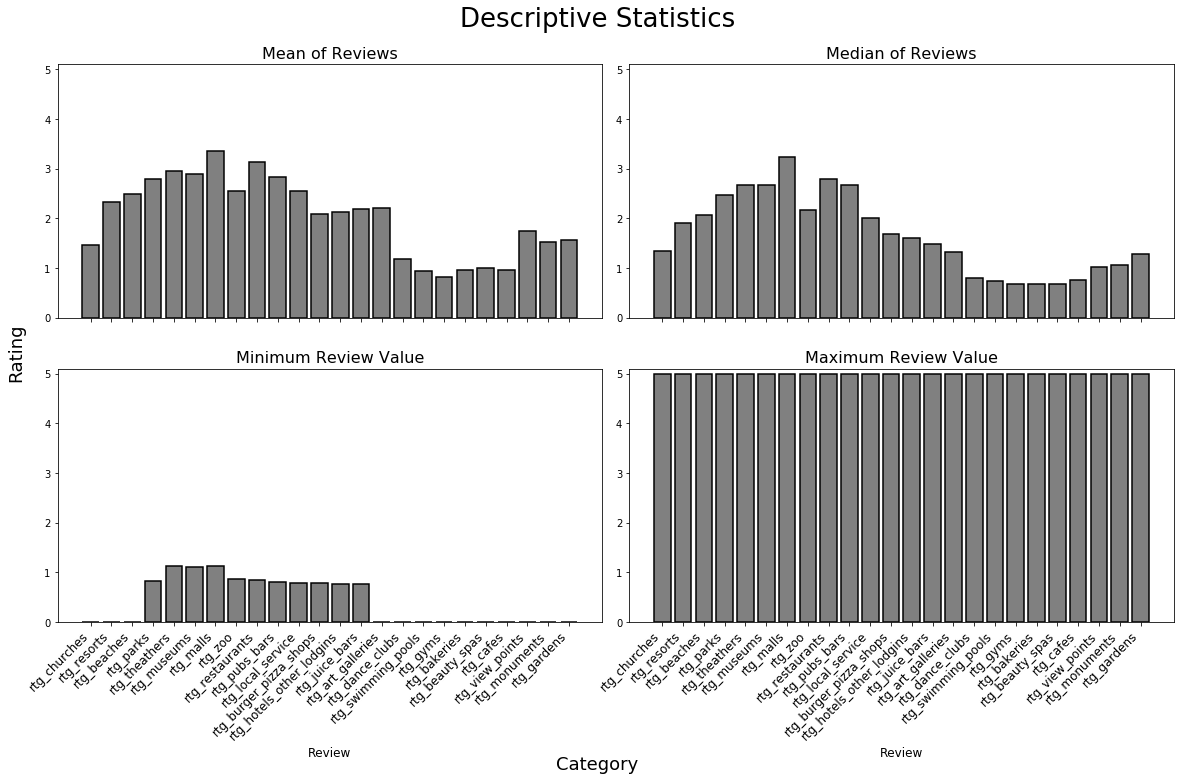

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=True)

# Main title
fig.suptitle('Descriptive Statistics', fontsize=26)

ax[0,0].bar(x=data_noUser.columns, height=mean_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[0,0].set_title('Mean of Reviews', fontsize=16)

ax[0,1].bar(x=data_noUser.columns, height=median_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[0,1].set_title('Median of Reviews', fontsize=16)

ax[1,0].bar(x=data_noUser.columns, height=min_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[1,0].set_title('Minimum Review Value', fontsize=16)
ax[1,0].set_xlabel('Review', fontsize=12)

ax[1,1].bar(x=data_noUser.columns, height=max_rev, color='gray', edgecolor='k', linewidth=1.5)
ax[1,1].set_title('Maximum Review Value', fontsize=16)
ax[1,1].set_xlabel('Review', fontsize=12)

# Rotate X-ticks, set i range lim and eliminate Gridlines
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(False)
    plt.ylim(0, 5.1)

# Main X Label
fig.text(0.5, -0.08, 'Category', ha='center', fontsize=18)

# Main Y Label
fig.text(0.09, 0.5, 'Rating', va='center', rotation='vertical', fontsize=18)

# Adjusting spaces between plots
plt.subplots_adjust(top=0.9, wspace=0.05)


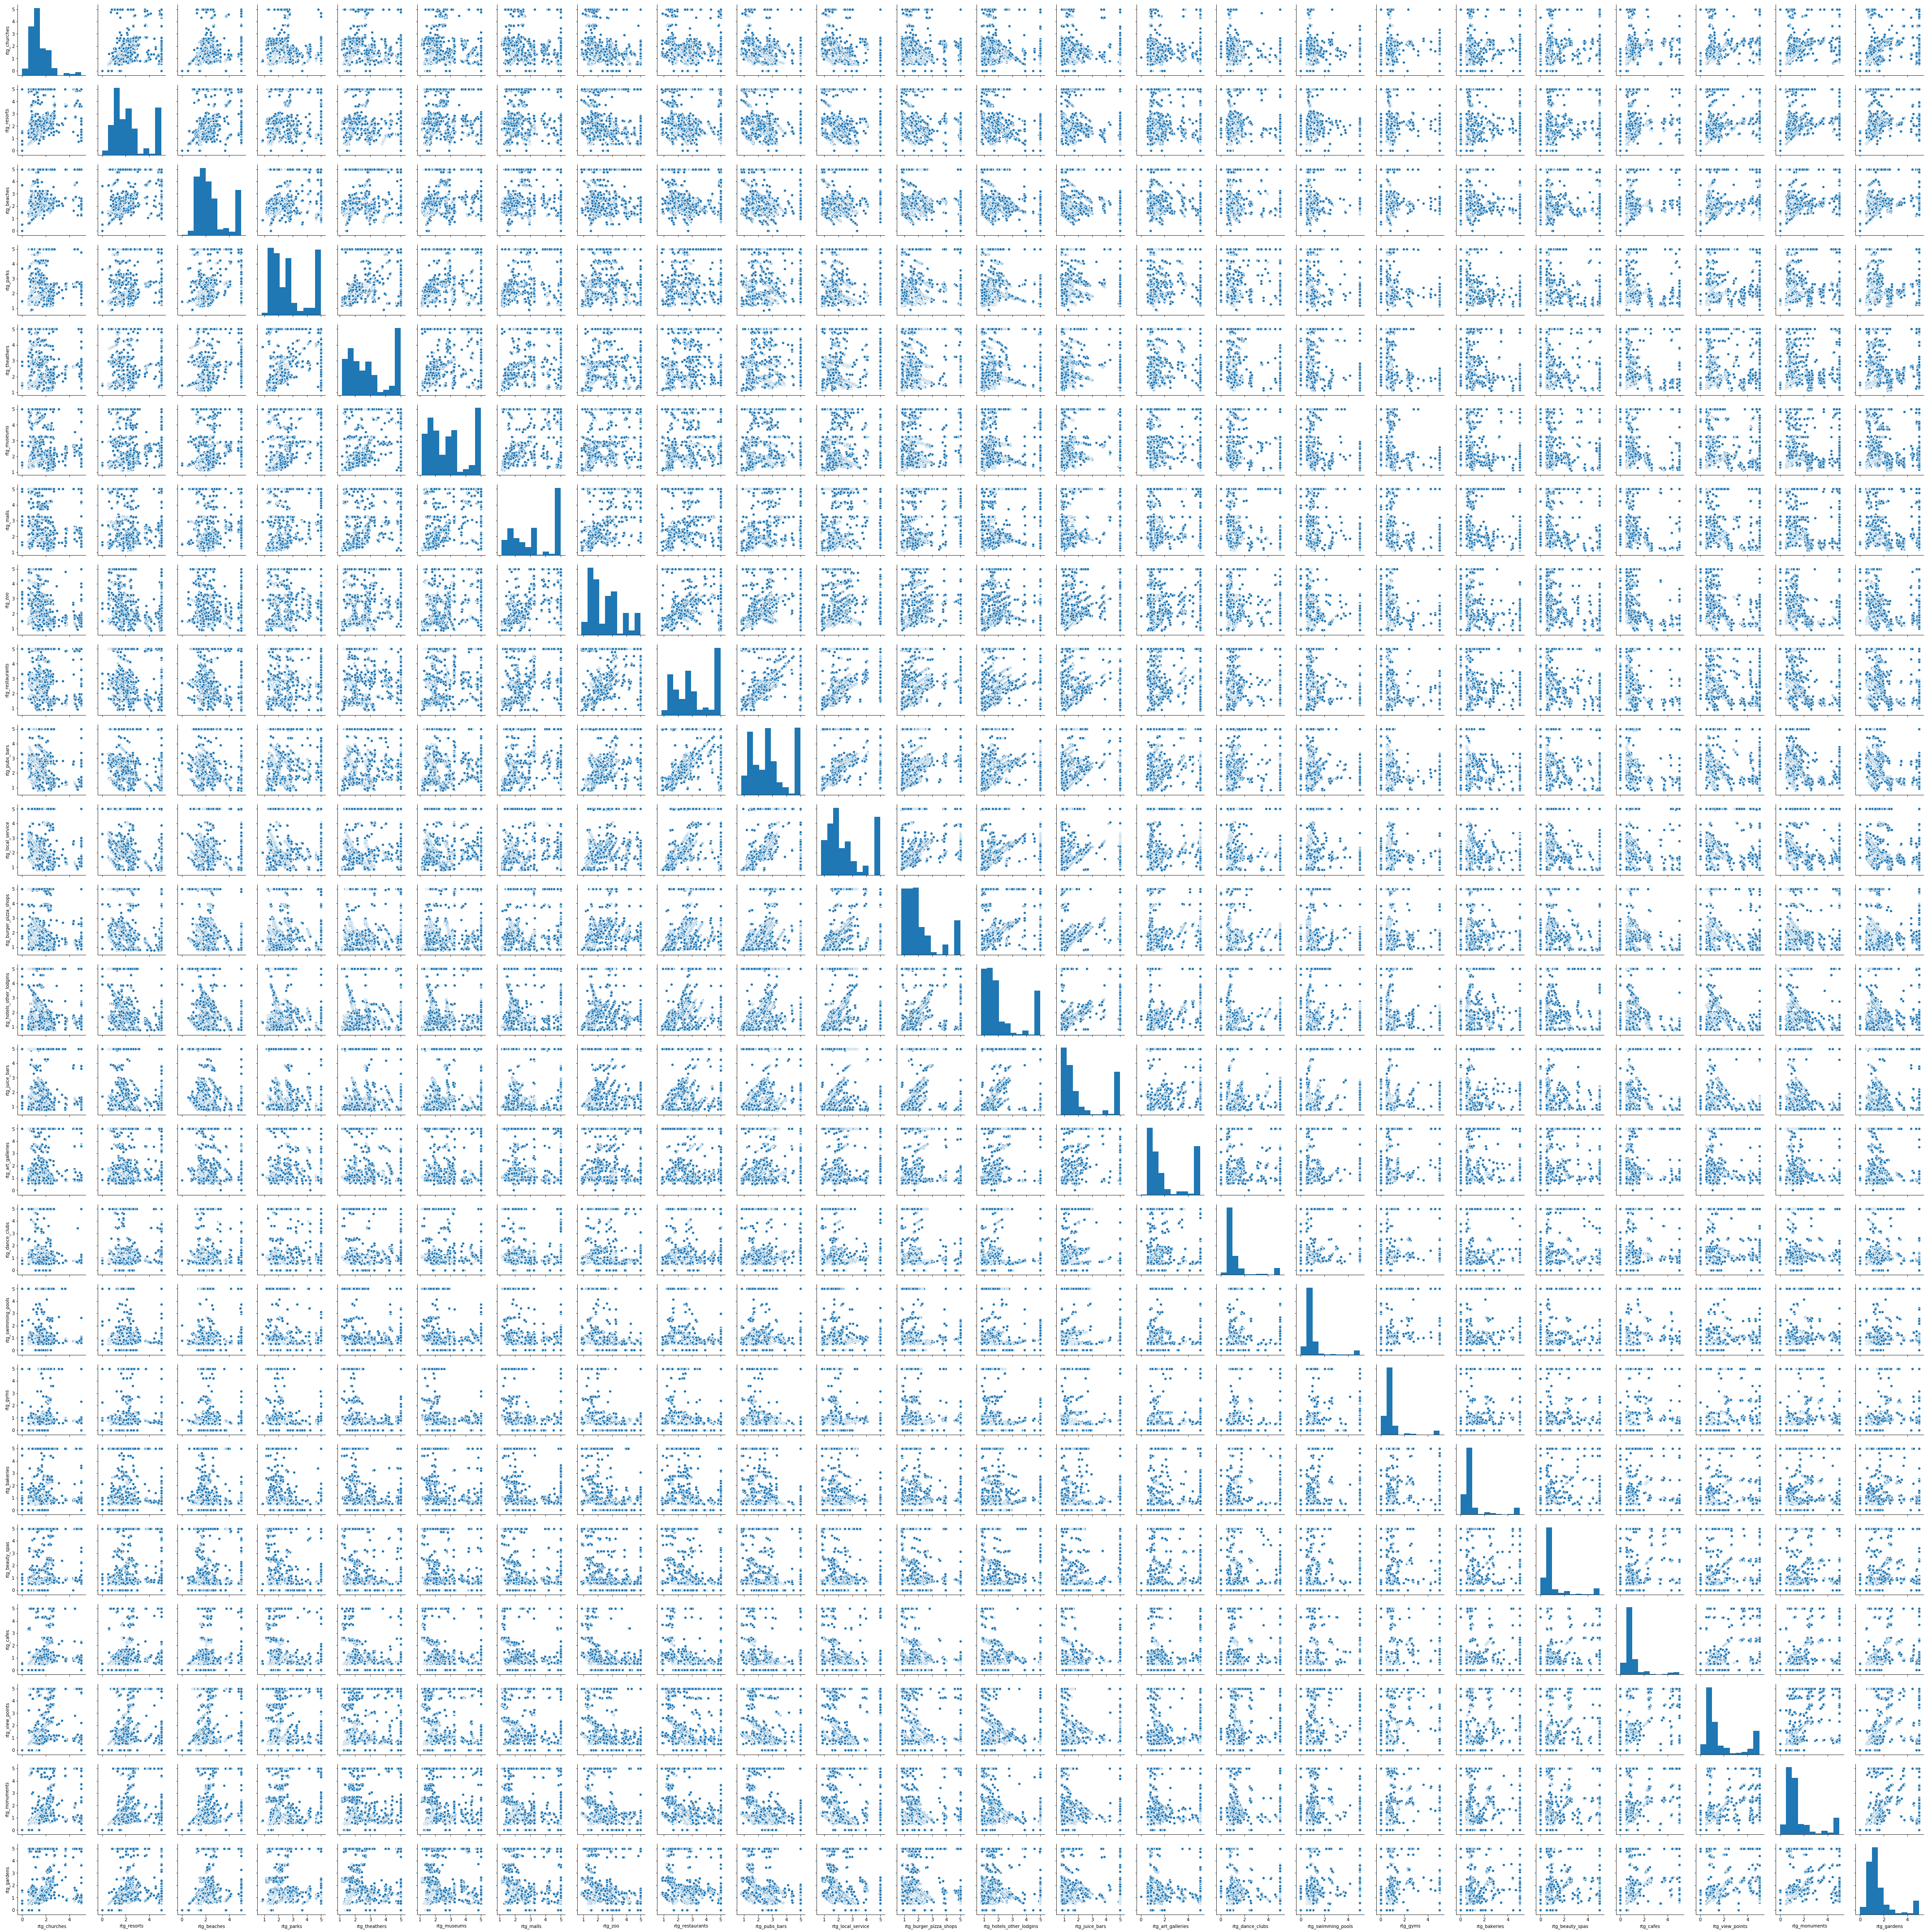

In [22]:
sns.pairplot(data_noUser)

In [28]:
inertia_cluster = []
for x in range(1, 25):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 6059)
    kmeans.fit(data_noUser)
    inertia_cluster.append(kmeans.inertia_)

Text(0.5, 1.0, 'Sum of Square Distances for Different Cluster Numbers')

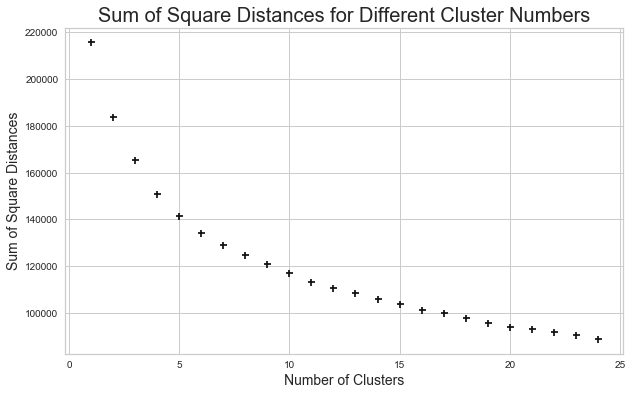

In [199]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=inertia_cluster, color='k', marker='+')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers', fontsize=20)

In [76]:
normalized_inertia = []

for inertia in inertia_cluster:
    normalized_inertia.append(inertia/np.max(inertia_cluster))

Text(0.5, 1.0, 'Normalized Sum of Square Distances for Different\nCluster Numbers')

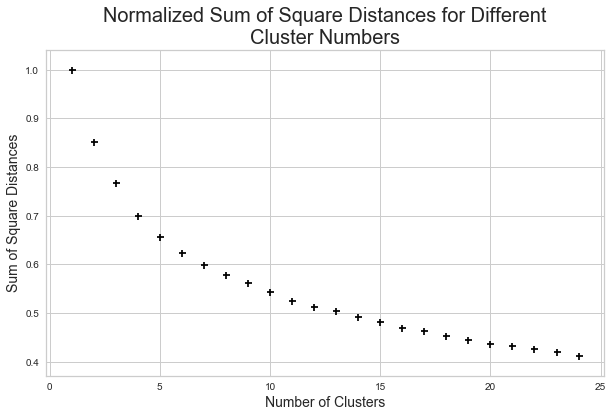

In [201]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=normalized_inertia, color='black', marker='+')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Normalized Sum of Square Distances for Different\nCluster Numbers', fontsize=20)

In [25]:
pca = PCA(n_components = 24)
pca.fit_transform(data_noUser)

array([[-1.04699367e+00, -2.55090784e+00, -2.17416548e+00, ...,
        -9.45319798e-02,  1.49107179e-01, -3.45370984e-01],
       [-1.09793072e+00, -2.61894298e+00, -2.11969369e+00, ...,
         5.74889803e-02,  1.80240363e-01, -3.52050194e-01],
       [-1.09999009e+00, -2.61200360e+00, -2.11906891e+00, ...,
         5.70130545e-02,  1.78911138e-01, -3.53968977e-01],
       ...,
       [ 5.92495510e+00,  1.48535922e+00, -1.66141874e-01, ...,
        -7.43330792e-01,  3.77495278e-02, -1.40502977e+00],
       [ 4.71796174e+00,  2.88614509e+00, -7.75863199e-01, ...,
        -6.90517926e-01,  3.94931733e-02, -1.34033280e+00],
       [ 5.90125082e+00,  1.24500420e+00, -3.07054691e-01, ...,
        -6.57133258e-01,  3.24008035e-03, -1.32415878e+00]])

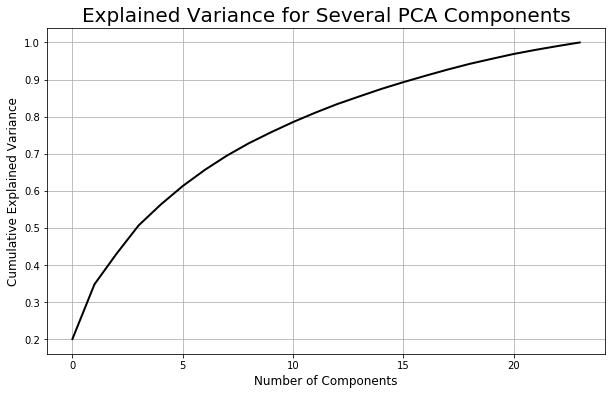

In [31]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', linewidth=2)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)

plt.title('Explained Variance for Several PCA Components', fontsize=20)

plt.grid(True)

In [44]:
isomap = Isomap(n_components=2)
projection = isomap.fit_transform(data_noUser)

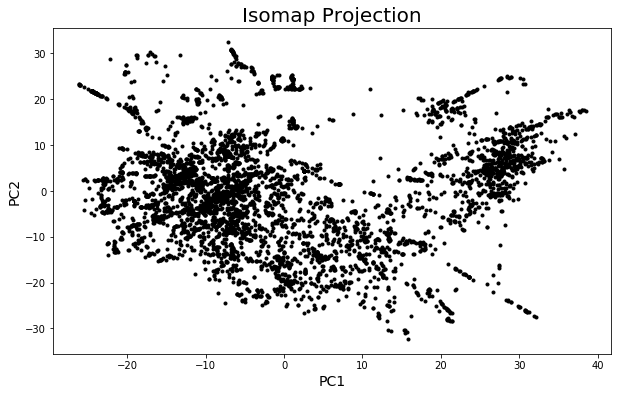

In [45]:
plt.figure(figsize=(10,6))

plt.scatter(projection[:, 0], projection[:, 1], marker='.', color='k')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('Isomap Projection', fontsize=20)
plt.grid(False)

In [46]:
inertia_isomap_proj = []

for x in range(1, 25):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 6059)
    kmeans.fit(projection)
    inertia_isomap_proj.append(kmeans.inertia_)

Text(0.5, 1.0, 'Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data')

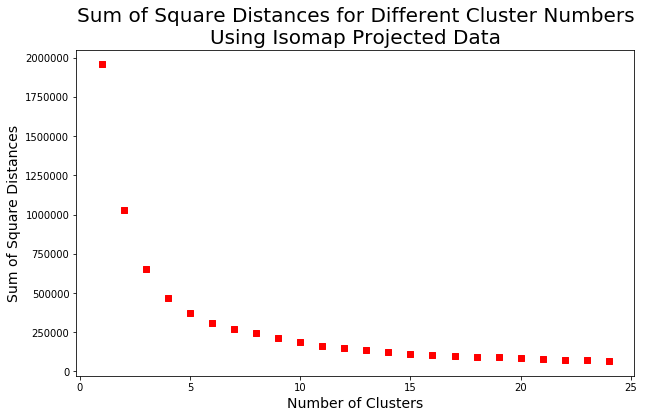

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=inertia_isomap_proj, marker='s', color='red')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data', fontsize=20)

In [51]:
normalized_inertia_isomap = []

for inertia in inertia_isomap_proj:
    normalized_inertia_isomap.append(inertia/np.max(inertia_isomap_proj))

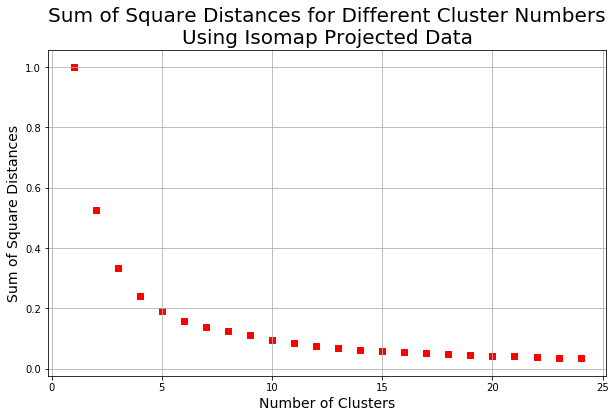

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x=range(1, 25), y=normalized_inertia_isomap, marker='s', color='red')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Distances', fontsize=14)
plt.title('Sum of Square Distances for Different Cluster Numbers\nUsing Isomap Projected Data', fontsize=20)
plt.grid(True)

In [260]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(projection)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

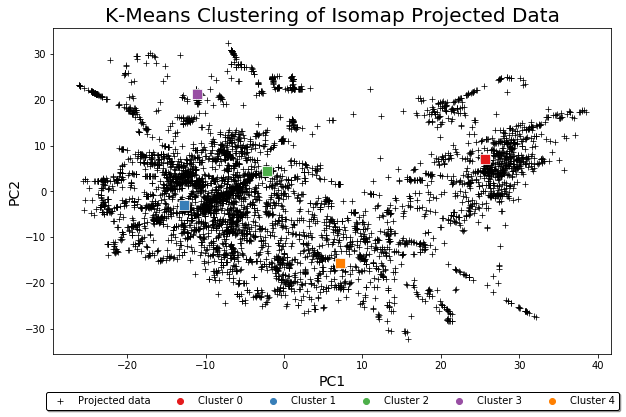

In [262]:
plt.figure(figsize=(10,6))

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

sns.scatterplot(projection[:, 0], projection[:, 1], marker='+', color='k', label='Projected data')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                hue=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                marker='s', s=100, palette=palette)

plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('K-Means Clustering of Isomap Projected Data', fontsize=20)

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                    fancybox=True, shadow=True, ncol=6).get_frame().set_edgecolor('black')
plt.grid(False)

In [172]:
# min_samples >= dimensions+1

db = DBSCAN(min_samples=30, eps=1.6)
db.fit(projection)

DBSCAN(algorithm='auto', eps=1.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=None, p=None)

In [173]:
labels = db.labels_

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 19
Estimated number of noise points: 1389


Text(0, 0.5, 'PC2')

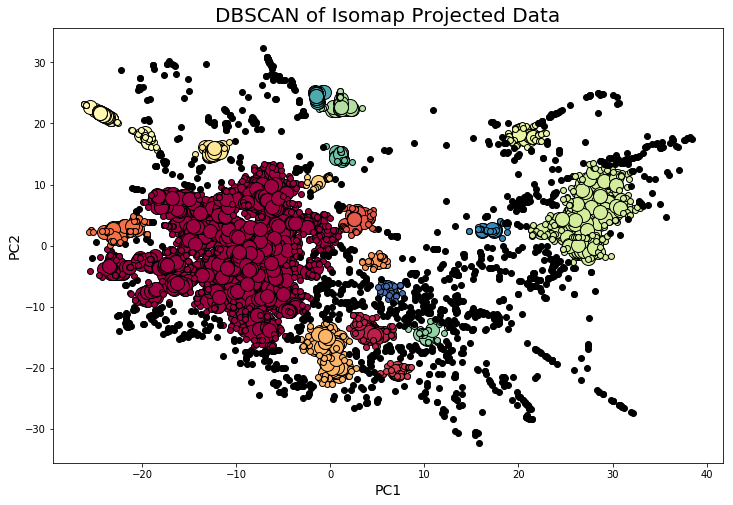

In [176]:
plt.figure(figsize=(12,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = projection[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = projection[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
plt.title('DBSCAN of Isomap Projected Data', fontsize=20)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

In [247]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(projection)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

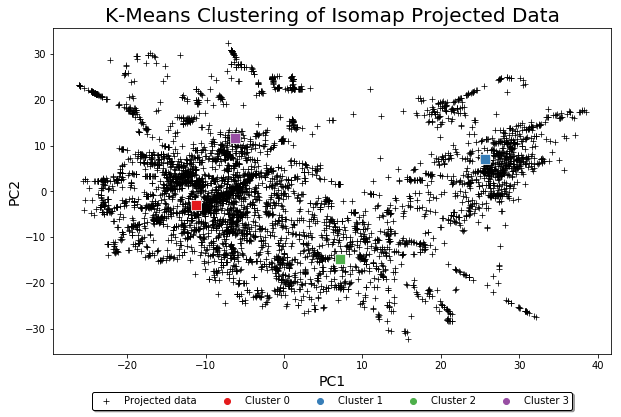

In [250]:
plt.figure(figsize=(10,6))

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

sns.scatterplot(projection[:, 0], projection[:, 1], marker='+', color='k', label='Projected data')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                hue=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
                marker='s', s=100, palette=palette)

plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('K-Means Clustering of Isomap Projected Data', fontsize=20)

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                    fancybox=True, shadow=True, ncol=6).get_frame().set_edgecolor('black')
plt.grid(False)

In [251]:
data_noUser['labels'] = kmeans.labels_
data_noUser.head()

rtg_churches  rtg_resorts  rtg_beaches  rtg_parks  rtg_theathers  \
0           0.0          0.0         3.63       3.65            5.0   
1           0.0          0.0         3.63       3.65            5.0   
2           0.0          0.0         3.63       3.63            5.0   
3           0.0          0.5         3.63       3.63            5.0   
4           0.0          0.0         3.63       3.63            5.0   

   rtg_museums  rtg_malls  rtg_zoo  rtg_restaurants  rtg_pubs_bars  ...  \
0         2.92        5.0     2.35             2.33           2.64  ...   
1         2.92        5.0     2.64             2.33           2.65  ...   
2         2.92        5.0     2.64             2.33           2.64  ...   
3         2.92        5.0     2.35             2.33           2.64  ...   
4         2.92        5.0     2.64             2.33           2.64  ...   

   rtg_dance_clubs  rtg_swimming_pools  rtg_gyms  rtg_bakeries  \
0             0.59                 0.5       0.0           0.5   
1             0.59                 0.5       0.0           0.5   
2             0.59                 0.5       0.0           0.5   
3             0.59                 0.5       0.0           0.5   
4             0.59                 0.5       0.0           0.5   

   rtg_beauty_spas  rtg_cafes  rtg_view_points  rtg_monuments  rtg_gardens  \
0              0.0        0.0              0.0            0.0          0.0   
1              0.0        0.0              0.0            0.0          0.0   
2              0.0        0.0              0.0            0.0          0.0   
3              0.0        0.0              0.0            0.0          0.0   
4              0.0        0.0              0.0            0.0          0.0   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 25 columns]

Text(0.5, 1.0, 'Number of Samples for Each Label')

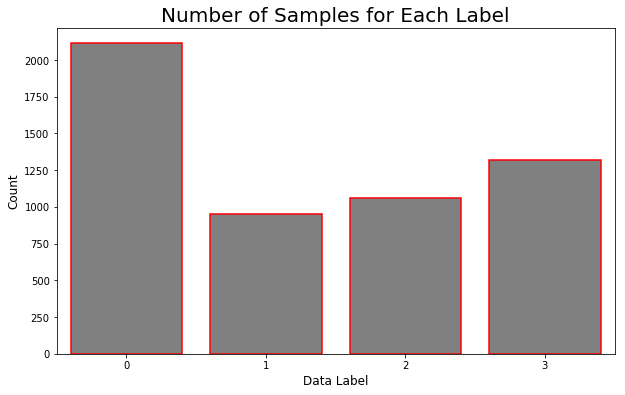

In [252]:
plt.figure(figsize=(10,6))

sns.countplot(data_noUser.labels, color='gray', edgecolor='red', linewidth=1.5)
plt.xlabel('Data Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Samples for Each Label', fontsize=20)

In [253]:
X = data_noUser.drop('labels', axis='columns').copy()
y = data_noUser.labels.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6059, stratify=y)

In [254]:
# Oversampling
sm = SMOTE(random_state=6059, sampling_strategy='not majority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

Text(0.5, 1.0, 'Number of Oversampled Samples for Each Label')

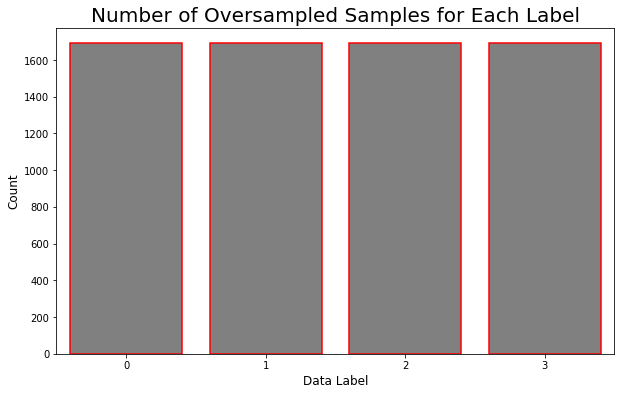

In [255]:
plt.figure(figsize=(10,6))

sns.countplot(y_train_res, color='gray', edgecolor='red', linewidth=1.5)
plt.xlabel('Data Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Oversampled Samples for Each Label', fontsize=20)

In [259]:
log_clf = LogisticRegression(multi_class='multinomial', solver='sag')
log_clf.fit(X_train_res, y_train_res)

y_pred = log_clf.predict(X_test)

print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       373
           1       0.96      0.94      0.95       195
           2       0.95      0.85      0.90       237
           3       0.82      0.76      0.79       286

   micro avg       0.86      0.86      0.86      1091
   macro avg       0.88      0.86      0.87      1091
weighted avg       0.86      0.86      0.86      1091



C:\Users\Jason Sosa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [269]:
# GridSearch for logistic Clf
logit_param_grid = {
    'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# Use GridSearch to find the best parameters.
logit_clf = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score, average='micro'),
    'recall_score': metrics.make_scorer(metrics.recall_score, average='micro'),
    'f1_score': metrics.make_scorer(metrics.f1_score, average='micro')
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(logit_clf, param_grid=logit_param_grid, scoring=scorers,
                               refit=refit_score, cv=skf, return_train_score=True)
    grid_search.fit(X_train_res, y_train_res)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

#     # confusion matrix on the test data.
#     print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
#                        columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

grid_logit_1 = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'C': 10}


In [272]:
results = pd.DataFrame(grid_logit_1.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score',
         'param_C', 'mean_train_precision_score']].round(3).head()

mean_test_precision_score  mean_test_recall_score  mean_test_f1_score  \
5                      0.888                   0.888               0.888   
4                      0.888                   0.888               0.888   
3                      0.886                   0.886               0.886   
2                      0.880                   0.880               0.880   
1                      0.868                   0.868               0.868   

  param_C  mean_train_precision_score  
5      10                       0.890  
4       1                       0.891  
3     0.1                       0.890  
2    0.01                       0.883  
1   0.001                       0.870